**Welcome to my Stock Market News Sentiment Analysis Project**

In this project, we perform sentiment analysis on a dataset related to stock market news, sourced from Kaggle, athis could  (https://www.kaggle.com/datasets/veer1516/finanical-sentiment-analysis?select=stock_data_precise.csv). The dataset contains two columns: one with text data and another with corresponding sentiment labels. Using natural language processing (NLP) techniques, we preprocess the data to make it suitable for machine learning models.

The primary goal of this project is to develop a model capable of accurately predicting whether a given stock market news headline conveys a positive or negative sentiment, based on the training data.

In [7]:
#We import some necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import nltk
import sklearn

In [8]:
df=pd.read_csv('stock_data_precise.csv')

In [9]:
df.head()

,Text,Sentiment
0,Apple reports record profits,positive
1,Netflix subscriber growth slows,negative
2,Tesla's stock price surges,positive
3,Amazon's cloud computing business grows,positive
4,Facebook's advertising revenue increases,positive


In [73]:
df.head(50)

,Sentence,Sentiment,text_length
0,A not bad but also not so great heist film. Ki...,negative,962
1,I saw this recent Woody Allen film because I'm...,negative,1311
2,Veteran British television director Alan Gibso...,negative,3959
3,If you enjoy seeing what must have started as ...,negative,580
4,This low-budget film about a writer who goes t...,negative,939
5,for those of you who were desperate to find ou...,negative,1067
6,This wasn't funny in 1972. It's not funny now....,negative,508
7,Leslie Nielsen is usually someone whose movies...,negative,956
8,'You're in the Navy Now' is painfully bad: ver...,negative,1588
9,I just finished watching Dog Watch. I thought ...,negative,659


In [11]:
df.shape

(50233, 2)

In [12]:
df.Sentiment.value_counts()

,count
Sentiment,
negative,25191
positive,25042


As we can see our dataset, is well balanced with 25191 negative texts, and 25042 positive ones.

In [13]:
df = df.rename(columns={'Text': 'Sentence'})

At this stage, I am renaming my columns because I was experimenting with different datasets, each having different column names. To maintain consistency, I am standardizing the column names.

In [15]:
fraction = 0.2
df_stratified = (df.groupby('Sentiment', group_keys=False).apply(lambda x: x.sample(frac=fraction, random_state=42)))#Take 20% from each group
df_stratified = df_stratified.reset_index(drop=True)#We reset index for our new dataset
print(df_stratified['Sentiment'].value_counts())

Sentiment
negative    5038
positive    5008
Name: count, dtype: int64


<ipython-input-15-f30349ae02ea>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=fraction, random_state=42))  # Take 20% from each group


Due to computational limitations, I will use 1/5 of the dataset, approximately 10,000 samples. I am applying a stratified sampling method to ensure that samples are evenly distributed across both classes, maintaining the balance.

In [69]:
df=df_stratified

Now, we will proceed with some Exploratory Data Analysis (EDA), such as examining text lengths, visualizing class distribution using a countplot, identifying the longest and shortest texts, as well as exploring some of the most frequent words.

In [70]:
df['text_length'] = df['Sentence'].str.len()
print(df['text_length'])

0         962
1        1311
2        3959
3         580
4         939
         ... 
10041    4196
10042    1596
10043    1075
10044    3974
10045    1248
Name: text_length, Length: 10046, dtype: int64


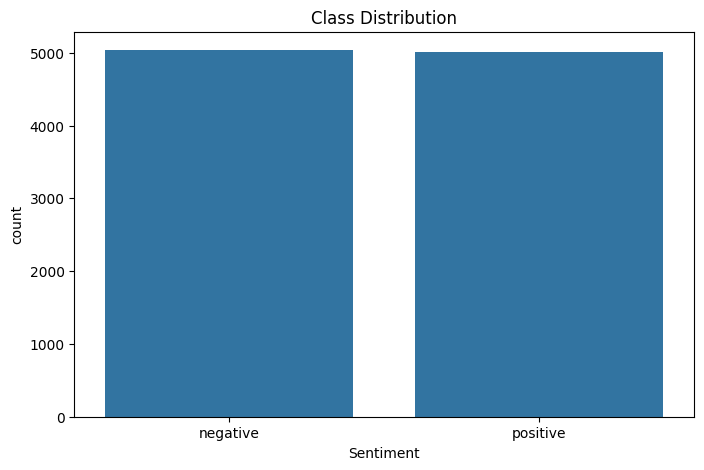

In [18]:
#Class distribution
plt.figure(figsize = (8,5))
sns.countplot(x = 'Sentiment', data = df)
plt.title('Class Distribution')
plt.show()

In [19]:
#Let's find the text with the shortest length and with the longest.
min_length = df['text_length'].min()
shortest_text = df[df['text_length'] == min_length]['Sentence'].iloc[0]
print(f"The shortest text has {min_length} characters:\n\n{shortest_text}")

The shortest text has 32 characters:

McDonald's sales growth declines


In [20]:
max_length = df['text_length'].max()
longest_text = df[df['text_length'] == max_length]['Sentence'].iloc[0]
print(f"The longest text has {max_length} characters:\n\n{longest_text}")

The longest text has 13704 characters:

Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which wou

In [21]:
#Here we find a random word
random_text=random.choice(df['Sentence'])
random_word=random.choice(random_text.split())
random_word_count=df['Sentence'].str.count(random_word).sum()
print('A random word is "' + random_word + '" and it appears ' + str(random_word_count) + ' times')


A random word is "explodes" and it appears 13 times


In [22]:
df = df.dropna(subset=['Sentence'])
allwords = " ".join(df['Sentence']).split()
allwords_counts = pd.Series(allwords).value_counts()
top10_words = allwords_counts.head(10)
print(top10_words)

the     114543
a        61693
and      61350
of       57015
to       53274
is       40952
in       34230
I        26656
that     25421
this     22964
Name: count, dtype: int64


As we can see, the most frequent words at the moment are stopwords. We will remove them shortly to ensure proper preprocessing

In [23]:
#We convert categorical labels into numerical values for use in machine learning models
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
Y = encoder.fit_transform(df['Sentiment'])
print(Y[:10])

[0 0 0 0 0 0 0 0 0 0]


In [24]:
news= df['Sentence']
print(news[:10])

0    A not bad but also not so great heist film. Ki...
1    I saw this recent Woody Allen film because I'm...
2    Veteran British television director Alan Gibso...
3    If you enjoy seeing what must have started as ...
4    This low-budget film about a writer who goes t...
5    for those of you who were desperate to find ou...
6    This wasn't funny in 1972. It's not funny now....
7    Leslie Nielsen is usually someone whose movies...
8    'You're in the Navy Now' is painfully bad: ver...
9    I just finished watching Dog Watch. I thought ...
Name: Sentence, dtype: object


We replace email addresses, URLs, money symbols, and numbers to standardize the text and reduce variability, ensuring the model focuses on meaningful patterns rather than irrelevant or unique details. This helps improve the model's generalization, simplifies the feature space, and prevents overfitting to specific tokens like emails or numbers.

In [82]:
processed = news.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
processed = processed.str.replace(r'£|\$', 'moneysymb')
processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

For similar reasons, we remove punctuation, replace multiple spaces with a single space, and strip leading or trailing whitespace to clean and normalize the text. This ensures consistency, reduces noise, and helps the model focus on meaningful patterns in the data without being affected by formatting issues.

In [83]:
processed = processed.str.replace(r'[^\w\d\s]', ' ')
processed = processed.str.replace(r'\s+', ' ')
processed = processed.str.replace(r'^\s+|\s+?$', '')

We will also change all words to lowercase to ensure consistency.

In [84]:
processed = processed.str.lower()
print(processed)

0        a not bad but also not so great heist film. ki...
1        i saw this recent woody allen film because i'm...
2        veteran british television director alan gibso...
3        if you enjoy seeing what must have started as ...
4        this low-budget film about a writer who goes t...
                               ...                        
10041    chokher bali was shown at the (washington) dc ...
10042    i purchased the dvd set on a recommendation fr...
10043    who votes in these ratings? "jacknife" is a be...
10044    three girls, the youngest descendents of the g...
10045    alfred hitchcock shows originality in the rema...
Name: Sentence, Length: 10046, dtype: object


In [89]:
from nltk.corpus import stopwords

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

We will also remove stopwords because they do not carry significant meaning or contribute valuable information for tasks like sentiment analysis.

In [30]:
stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [31]:
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
    ps.stem(term) for term in x.split()))

In [32]:
print(processed)

0        bad also great heist film. kirk dougla recent ...
1        saw recent woodi allen film i'm fan work make ...
2        veteran british televis director alan gibson' ...
3        enjoy see must start 2 hour movi unconnect bur...
4        low-budget film writer goe work london casino ...
                               ...                        
10041    chokher bali shown (washington) dc filmfest ap...
10042    purchas dvd set recommend amazon.com base inte...
10043    vote ratings? "jacknife" beauti acted, brillia...
10044    three girls, youngest descend gaylord family, ...
10045    alfr hitchcock show origin remak 1934 british ...
Name: Sentence, Length: 10046, dtype: object


Now we will proceed to the tokenization phase. Tokenization is the process of breaking text into smaller units like words, subwords, or characters. This crucial step in NLP transforms raw text into a structured format for algorithms to process. It helps models analyze and understand text better, enabling tasks like sentiment analysis and text classification, while also supporting preprocessing steps like removing stopwords and stemming.

In [33]:
from nltk.tokenize import word_tokenize

In [34]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [35]:
tokenized_news = processed.apply(word_tokenize)

In [36]:
print(tokenized_news.head())

0    [bad, also, great, heist, film, ., kirk, dougl...
1    [saw, recent, woodi, allen, film, i, 'm, fan, ...
2    [veteran, british, televis, director, alan, gi...
3    [enjoy, see, must, start, 2, hour, movi, uncon...
4    [low-budget, film, writer, goe, work, london, ...
Name: Sentence, dtype: object


We will also visualize a frequency distribution graph to observe how often certain tokens occur in the dataset.

<Axes: xlabel='Samples', ylabel='Counts'>

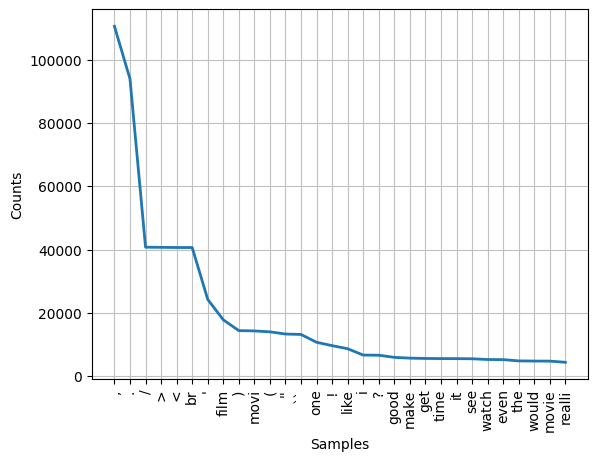

In [37]:
nltk.FreqDist(tokenized_news.sum()).plot(30,cumulative=False)

We will now proceed to the vectorization stage. Vectorization converts text into numerical representations for machine learning. Given our dataset of approximately 10k stock market news samples, we use TF-IDF (Term Frequency-Inverse Document Frequency) to focus on the importance of specific terms in each news item while reducing the influence of frequently occurring but less informative words

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1500)
tfidf_matrix = vectorizer.fit_transform(processed)
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("Sample TF-IDF Values:\n", tfidf_matrix.toarray()[:5])

TF-IDF Matrix Shape: (10046, 1500)
Sample TF-IDF Values:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


At this point we have clean processed data ready to be trained. From classical machine learning models, we will try Logistic Regression, SVM and Naive Bayes. In all models, we will use stratify in train_test_split to ensure equal representation of both classes in the training and testing sets.

In [46]:
#Logistic Regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
logistic_model = LogisticRegression(max_iter=1000)
X_train,X_test,Y_train,Y_test = train_test_split(tfidf_matrix,Y,test_size=0.2,stratify=Y,random_state=42)
logistic_model.fit(X_train,Y_train)
Y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
cv_scores = cross_val_score(logistic_model, tfidf_matrix, Y, cv=5)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1008
           1       0.85      0.87      0.86      1002

    accuracy                           0.86      2010
   macro avg       0.86      0.86      0.86      2010
weighted avg       0.86      0.86      0.86      2010

Mean Cross-Validation Score: 0.85


Logistic Regression is a widely used algorithm for binary classification tasks, such as determining sentiment (negative or positive). We use Logistic Regression because it is simple, efficient, and provides interpretable results, making it an ideal starting point for machine learning projects.

Classification Report explained:


*   Precision: Measures how many of the predicted positive cases are actually positive

*   Recall: Measures how many of the actual positive cases are correctly identified

*   F1 Score: The mean of prescision and recall, balancing their trade-off. A high F1 score indicates a better balance between precision and recall, which is critical when both false positive and false negatives matter

As we can see for this Logistic Regression model, the metrics show a balanced performance across both classes.






Below, we will implement a confusion matrix to evaluate the performance of the classification model. The Confusion Matrix is a table that compares the model's predicted labels with the true labels. Here's how it works:

*   Rows represent the true labels (Negative and Positive)
*   Columns represent the predicted labels (Negative and Positive)




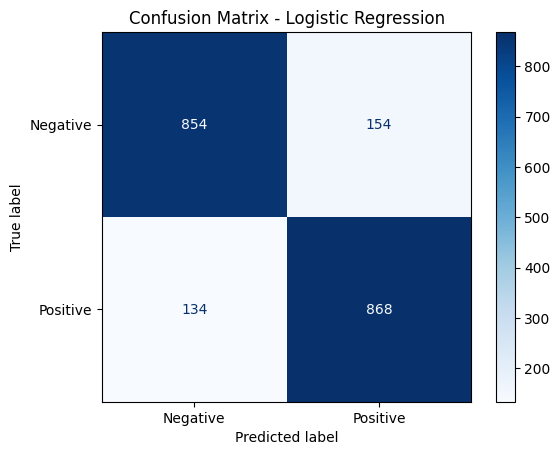

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

For this specific example:

1.   Top-left (854): True negatives-correctly predicted negative samples.
2.   Top-right(154): False positives-negative samples incorrectly predicted as positive.
3.   Bottom-left(134): False negatives-positive samples incorrectly predicted as negative.
4.   Bottom-right(868): True positives-correctly predicted positive samples.


By visualizing the confusion matrix, you can better understand the types of errors your model makes, such as whether it struggles more with false positives or false negatives.






The following lines of code identify misclassified samples from the Logistic Regression model. These are sentences where the model's predicted label differs from the true label.

In [55]:
test_indices = y_test.index
df_errors_logistic = pd.DataFrame({
    'Text': df.loc[test_indices, 'Sentence'],
    'True_Label': y_test.values,
    'Predicted_Label': y_pred_logistic})
df_misclassified_logistic = df_errors_logistic[df_errors_logistic['True_Label'] != df_errors_logistic['Predicted_Label']]
print("Misclassified Samples (Logistic Regression):")
print(df_misclassified_logistic)


Misclassified Samples (Logistic Regression):
                                                   Text True_Label  \
357   I bought this DVD as part of a set of 50 "hist...   negative   
5236  Casting unknown Michelle Rodriguez as Diana wa...   positive   
9932  This is by far my favorite film of all time. T...   positive   
4496  I rented this film out having heard of the fus...   negative   
1761  I think it's a great movie!! It's fun, maybe a...   negative   
...                                                 ...        ...   
1585  Found this film in a DVD discount rack for $10...   negative   
2928  Many people like to point to this TV movie whe...   negative   
853   Your time and brains will be much better spent...   negative   
6692  This movie is plain fun.I has nothing to do wi...   positive   
5927  The film begins with a cranky old Broadway pro...   positive   

     Predicted_Label  
357         positive  
5236        negative  
9932        negative  
4496        positive  

For example, sentences containing words like 'DVD,' 'TV,' 'movie,' or 'film' seem to be commonly misclassified. This suggests that the model might struggle with these contexts. Perhaps if we remove these words, our model might perform slightly better.

In [56]:
#SVM
from sklearn.svm import SVC
svm_model = SVC(kernel= 'linear', random_state=42)
svm_model.fit(X_train, Y_train)
Y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(Y_test,Y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
cv_scores = cross_val_score(svm_model, tfidf_matrix, Y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1008
           1       0.83      0.86      0.85      1002

    accuracy                           0.84      2010
   macro avg       0.84      0.84      0.84      2010
weighted avg       0.84      0.84      0.84      2010


Cross-Validation Scores: [0.85820896 0.84021901 0.84868094 0.83026381 0.84121453]
Mean Cross-Validation Score: 0.84


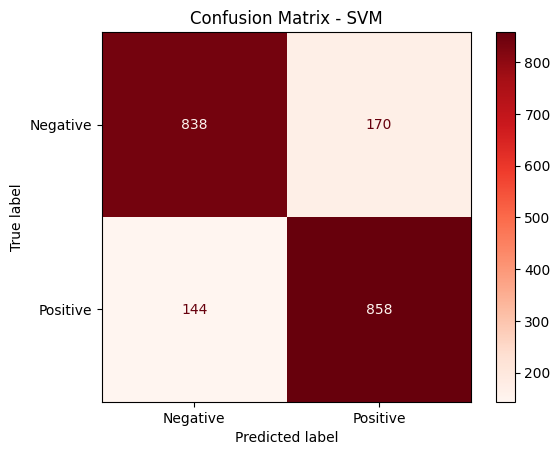

In [62]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Reds")
plt.title("Confusion Matrix - SVM")
plt.show()

This confusion matrix visualizes the performance of the SVM model. As we can observe, SVM also performed fairly well, but its performance is slightly lower than Logistic Regression in terms of correctly identifying both negative and positive classes. Specifically, the misclassifications (170 false positives and 144 false negatives) indicate areas where the SVM model struggled compared to Logistic Regression.

In [65]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)
Y_pred = nb_model.predict(X_test)
cv_scores = cross_val_score(nb_model, tfidf_matrix, Y ,cv=20)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1008
           1       0.83      0.85      0.84      1002

    accuracy                           0.84      2010
   macro avg       0.84      0.84      0.84      2010
weighted avg       0.84      0.84      0.84      2010

Cross-Validation Scores: [0.8528827  0.8528827  0.8111332  0.83101392 0.82902584 0.84294235
 0.82071713 0.8187251  0.84262948 0.83665339 0.83466135 0.81075697
 0.80677291 0.82270916 0.85059761 0.83466135 0.83266932 0.83665339
 0.812749   0.86055777]
Mean Cross-Validation Score: 0.83


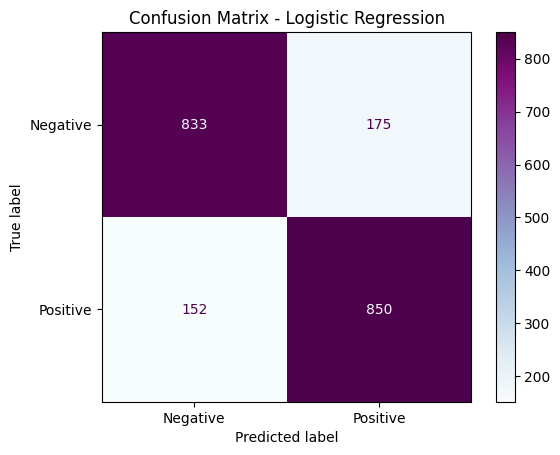

In [68]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="BuPu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

The confusion matrix for the Naive Bayes model shows its ability to classify negative and positive samples. While it performs fairly well, it has more misclassifications compared to Logistic Regression and SVM. Specifically, it misclassifies 190 negative samples as positive and 160 positive samples as negative.

**DEEP LEARNING**

We will now continue with the exploration of deep learning models. In this project, I utilized two different architectures: an LSTM model and a CNN+GRU hybrid model

In [ ]:
#LSTM Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
texts = df['Sentence']
labels = df['Sentiment']
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=100)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42, stratify=labels)

model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    LSTM(32),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.1)
y_pred_prob = model.predict(X_test) #Predict probabilites
y_pred = (y_pred_prob > 0.5).astype(int) #Convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred) #Calculate evaluation metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Epoch 1/5
452/452 ━━━━━━━━━━━━━━━━━━━━ 83s 168ms/step - accuracy: 0.6361 - loss: 0.6133 - val_accuracy: 0.8085 - val_loss: 0.4086
Epoch 2/5
452/452 ━━━━━━━━━━━━━━━━━━━━ 73s 161ms/step - accuracy: 0.8763 - loss: 0.3168 - val_accuracy: 0.8147 - val_loss: 0.4202
Epoch 3/5
452/452 ━━━━━━━━━━━━━━━━━━━━ 80s 157ms/step - accuracy: 0.9388 - loss: 0.1803 - val_accuracy: 0.8047 - val_loss: 0.5619
Epoch 4/5
452/452 ━━━━━━━━━━━━━━━━━━━━ 82s 157ms/step - accuracy: 0.9543 - loss: 0.1310 - val_accuracy: 0.7935 - val_loss: 0.6380
Epoch 5/5
452/452 ━━━━━━━━━━━━━━━━━━━━ 80s 153ms/step - accuracy: 0.9685 - loss: 0.0920 - val_accuracy: 0.8022 - val_loss: 0.7343
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step
Accuracy: 0.7796
Precision: 0.8355
Recall: 0.6946
F1-Score: 0.7586


I trained the dataset for 5 epochs, and the results were slightly below those of the classical models. Perhaps if I had increased the number of epochs, deep learning, in general, has the potential to achieve stronger results compared to classical models. However, due to limited computational resources and time constraints, it was challenging to achieve better results.

In [ ]:
#CNN&GRU Model
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer
print(df['Sentiment'].value_counts())
df['Sentiment'] = df['Sentiment'].map({'positive': 1, 'negative': 0})
X = df['Sentence'].tolist()
y = df['Sentiment'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
        )
        return {
            "input_ids": encoding["input_ids"].squeeze(0),
            "attention_mask": encoding["attention_mask"].squeeze(0),
            "labels": torch.tensor(label, dtype=torch.float),
        }

train_dataset = SentimentDataset(X_train, y_train, tokenizer, max_len=128)
test_dataset = SentimentDataset(X_test, y_test, tokenizer, max_len=128)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)

class CNN_GRU_Model(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_filters, kernel_sizes):
        super(CNN_GRU_Model, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(1, num_filters, (k, embedding_dim)) for k in kernel_sizes
        ])
        self.gru = nn.GRU(num_filters, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.embedding(x).unsqueeze(1)
        x = [torch.relu(conv(x)).squeeze(3) for conv in self.convs]
        x = [torch.max_pool1d(c, c.size(2)).squeeze(2) for c in x]
        x = torch.stack(x, dim=1)
        _, hidden = self.gru(x)
        hidden = self.dropout(hidden.squeeze(0))
        return self.fc(hidden)


vocab_size = len(tokenizer.vocab) #Define Hyperparameters
embedding_dim = 50
hidden_dim = 128
output_dim = 1
num_filters = 100
kernel_sizes = [3, 4, 5]
model = CNN_GRU_Model(vocab_size, embedding_dim, hidden_dim, output_dim, num_filters, kernel_sizes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Train and Evaluate Functions
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        for batch in train_loader:
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)
            optimizer.zero_grad()
            outputs = model(input_ids).squeeze(1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            preds = torch.round(torch.sigmoid(outputs))
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader):.4f}, Accuracy: {correct/total:.4f}")

def evaluate_model(model, test_loader):
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].to(device)
            labels = batch["labels"].to(device)
            outputs = model(input_ids).squeeze(1)
            preds = torch.round(torch.sigmoid(outputs))
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    acc = accuracy_score(true_labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predictions, average="binary")
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

#Train and Evaluate
train_model(model, train_loader, criterion, optimizer, num_epochs=3)
evaluate_model(model, test_loader)

Sentiment
negative    5038
positive    5008
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Epoch 1/3, Loss: 0.6937, Accuracy: 0.5238
Epoch 2/3, Loss: 0.5760, Accuracy: 0.6979
Epoch 3/3, Loss: 0.4050, Accuracy: 0.8255
Accuracy: 0.7468, Precision: 0.7285, Recall: 0.7844, F1 Score: 0.7554


From the CNN+GRU hybrid model, we observe lower accuracy and precision compared to the LSTM model, but it achieves slightly higher recall while maintaining the same F1-score of 0.76. This indicates that while CNN+GRU can identify a few more true positives (higher recall), it sacrifices precision, meaning there are more false positives. The overall F1-score, which balances precision and recall, remains unchanged compared to LSTM.

BERT and some of its alternatives (DistilBERT, ALBERT) were attempted; however, I faced significant computational and time constraints. When one of these models finally ran, the results were even lower than expected, so I decided not to include that model in this project. Additionally, the lower performance of deep learning models compared to classical ones might be attributed to suboptimal configurations and, more likely, overfitting. The dataset I used contained 10,000 samples, which is considered relatively small for deep learning algorithms. Once again, due to time limitations and computational constraints, I was unable to explore this further

We will now compare the results of the classical and deep learning models by creating a dataframe. The rows will represent metrics such as accuracy, precision, recall, and F1-score for each model. This visualization will help us better understand the performance differences across the models.

In [ ]:
 data = {"Model": ["Logistic Regression", "SVM", "Naive Bayes", "LSTM", "CNN-GRU"],
    "Accuracy": [0.85, 0.84, 0.83, 0.78, 0.74],
    "Precision": [0.86, 0.84, 0.84, 0.84, 0.73],
    "Recall": [0.86, 0.84, 0.84, 0.69, 0.78],
    "F1-Score": [0.86, 0.84, 0.84, 0.76, 0.76],}


In [ ]:
df_metrics = pd.DataFrame(data)
print(df_metrics)

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression      0.85       0.86    0.86      0.86
1                  SVM      0.84       0.84    0.84      0.84
2          Naive Bayes      0.83       0.84    0.84      0.84
3                 LSTM      0.78       0.84    0.69      0.76
4              CNN-GRU      0.74       0.73    0.78      0.76


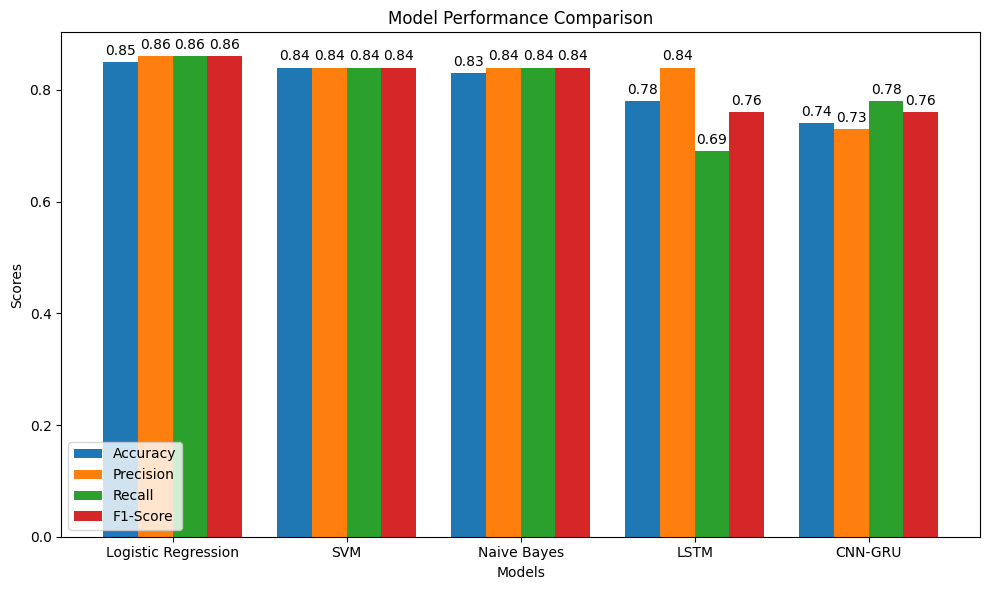

In [ ]:
models = df_metrics['Model'] #Data visualization
accuracy = df_metrics['Accuracy']
precision = df_metrics['Precision']
recall = df_metrics['Recall']
f1_score = df_metrics['F1-Score']
x = np.arange(len(models))
width = 0.2  #Width of the bars
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1-Score')
ax.set_xlabel('Models') #Labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.tight_layout() #Show plot
plt.show()


As we can observe, Logistic Regression performed better than all the other models, including both classical and deep learning models, in terms of accuracy, precision, recall, and F1-score. It demonstrated a well-balanced performance across both positive and negative classes, making it the most reliable choice for this dataset.

SVM followed closely behind Logistic Regression with only marginally lower scores across all metrics. Naive Bayes also performed competitively, achieving consistent results, though slightly below the top performers.

On the other hand, deep learning models, such as LSTM and the CNN-GRU hybrid, showed lower performance compared to classical models. While LSTM achieved a better F1-score compared to CNN-GRU, the CNN-GRU model showed higher recall. The relatively weaker performance of these deep learning models could be attributed to limited computational resources, insufficient training epochs, and the relatively small dataset of 10k samples, which might not have been large enough to fully leverage the potential of deep learning algorithms.

This analysis highlights the robustness and efficiency of classical models for datasets of this scale and complexity. However, with more resources and tuning, deep learning models could potentially surpass these results.



Thanks for your time.